# Goodreads-books


<img src="Images/book1.jpg">

The basic idea behind analysing the Goodreads dataset is to get a fair idea about the relationships between the multiple attributes a book might have, such as:the aggregrate rating of each book, the trend of the authors over the years and books with numerous languages. With over a hundred thousand ratings, there are books which just tend to become popular as each day seems to pass.

We've always conisdered the magical persona books seem to hold, and with this notebook, we step out on a journey to see what kind of books really drives people to read in this era of modern smart devices.

With such a vast, overwhelming number of factors, we'll go over such demographics:

* Does any relationship lie between ratings and the total ratings given?
* Where do majority of the books lie, in terms of ratings - Does reading a book really bring forth bias for the ratings?
* Do authors tend to perform same over time, with all their newer books? Or do they just fizzle out.
* Do number of pages make an impact on reading styles, ratings and popularity?
* Can books be recommended based on ratings? Is that a factor which can work?

## 1).Import Module

* **Packages Imported** :-

    1. sys: access to system parameters
    2. numpy : for numerical computation
    3. pandas: for data manipulation and analysis
    4. matplotlib: plotting library
    5. seaborn: plotting library based on matplotlib
    6. sklearn: machine learning library

In [1]:
# load packages
import numpy as np
import pandas as pd

In [47]:
#import visual modules
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go
sns.set_style("whitegrid")

In [48]:
init_notebook_mode(connected = True)

In [3]:
## version of packages used
print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
#print(f'Matplotlib version: {plt.__version__}')
print(f'Seaborn version: {sns.__version__}')

Numpy version: 1.15.4
Pandas version: 0.23.4
Seaborn version: 0.9.0


## 2).The Data

**The data contain following information :-**

* **bookIDA :** unique Identification number for each book.
* **title :** The name under which the book was published.
* **authors :** Names of the authors of the book. Multiple authors are delimited with/.
* **average_rating :** The average rating of the book received in total.
* **isbn :** Another unique number to identify the book, the International Standard Book Number.
* **isbn13 :** A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.
* **language_code :** Helps understand what is the primary language of the book. For instance, eng is standard for English.
* **num_pages :** Number of pages the book contains.
* **ratings_count :** Total number of ratings the book received.
* **text_reviews_count :** Total number of written text reviews the book received.
* **publication_date :** Date when the book was first published.
* **publisher :** The name of the publisher. 


**Read the data from the books.csv file in Books folder**

In [4]:
#save the data from books.csv in books dataframe
books=pd.read_csv("Images/books.csv",error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


Using head function to display the data in books

In [5]:
#displaying first 5 rows from the books datasset
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [6]:
#using shape funtion to get the number of rows and column of the data.
books.shape

(11123, 12)

There are 11123 rows and 12 columns in books dataframe


In [7]:
#Using describe function to view the statistical details like percentile ,mean,std etc.
books.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


~From the data we got various statistical information like max averge_rating is 5. which means the rating is out of 5.

In [8]:
#using the info function to get the concise summary of the dataframe
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
bookID                11123 non-null int64
title                 11123 non-null object
authors               11123 non-null object
average_rating        11123 non-null float64
isbn                  11123 non-null object
isbn13                11123 non-null int64
language_code         11123 non-null object
  num_pages           11123 non-null int64
ratings_count         11123 non-null int64
text_reviews_count    11123 non-null int64
publication_date      11123 non-null object
publisher             11123 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


 **We get the info that:-**
   * bookID ,isbn13 ,num_pages ,ratings_count ,text_reviews_count are of datatype int64
   * title ,authors ,isbn ,language_code ,publication_date ,publisher  are of datatype object
   * average_rating are of dataype float64
   
   ~Also the memory required for the books dataframe is about 1.0+ MB
   


**To make our data small and fast we need to decrease the memory space required by the data**
So for that we need to know what exact memory space taken by each column and the exact space of the dataframe.

## 2).Making dataframe faster and smaller

In [9]:
#To get exact memory space books dataframe is using
books.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
bookID                11123 non-null int64
title                 11123 non-null object
authors               11123 non-null object
average_rating        11123 non-null float64
isbn                  11123 non-null object
isbn13                11123 non-null int64
language_code         11123 non-null object
  num_pages           11123 non-null int64
ratings_count         11123 non-null int64
text_reviews_count    11123 non-null int64
publication_date      11123 non-null object
publisher             11123 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 5.2 MB


~The total memory usage is 5.2MB

In [10]:
#to get the memory usage of each individual column
books.memory_usage(deep = True)

Index                      80
bookID                  88984
title                 1044646
authors                925543
average_rating          88984
isbn                   745240
isbn13                  88984
language_code          670637
  num_pages             88984
ratings_count           88984
text_reviews_count      88984
publication_date       731048
publisher              806283
dtype: int64

**Making the books dataframe fast and small**
* Converting publication_date from object to datetime datatype
* Converting language_code from object to category 

In [11]:
#changing publication_date column from object to dateTime 
books["publication_date"] = pd.to_datetime(books["publication_date"],  errors='coerce')

In [12]:
#changing language_code column from object to category
books["language_code"] = books["language_code"].astype("category")

In [13]:
books["language_code"].cat.codes.head()

0    5
1    5
2    5
3    5
4    5
dtype: int8

**why we can remove isbn column from books dataframe?**

There are 2 column isbn and isbn13 in books dataframe.isbn consist of 11 digit number assigned to books.But after 2007 13 digit number are assigned to books .Each book has a unique isbn13 and isbn 11. As both are acting as an identity for the books so we can remove one column i.e isbn column because now isbn13 is used.

In [14]:
#dropping the isbn column.
books.drop(["isbn"],axis = 1,inplace = True)

when exploring the data there are many rows which do not have books ,so remove those rows.

In [15]:
no_book = books[books["authors"] == "NOT A BOOK"]
no_book["title"].count()

5

The above list are not the books but the series so we have to delete those specific rows

In [16]:
books.drop(no_book.index,axis = 0,inplace = True)

In [17]:
#Converting the the author column into the list 
#books["authors"] = books["authors"].apply(lambda x: x.split("/"))
#books["authors"].head()

In [18]:
books.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11118 entries, 0 to 11122
Data columns (total 11 columns):
bookID                11118 non-null int64
title                 11118 non-null object
authors               11118 non-null object
average_rating        11118 non-null float64
isbn13                11118 non-null int64
language_code         11118 non-null category
  num_pages           11118 non-null int64
ratings_count         11118 non-null int64
text_reviews_count    11118 non-null int64
publication_date      11116 non-null datetime64[ns]
publisher             11118 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 3.3 MB


Now we can see that the memory usage is 3.3 MB from 5.2 MB. 
this is beneficial cause 
* will make books dataframe faster.
* will become smaller

In [19]:
print("The dataframe contains books published from {} to {} year".format(books["publication_date"].min().year,
                                                                         books["publication_date"].max().year))


The dataframe contains books published from 1900 to 2020 year


## 3).Data Analysis and Visualization


### Lets find out number of books in different languages

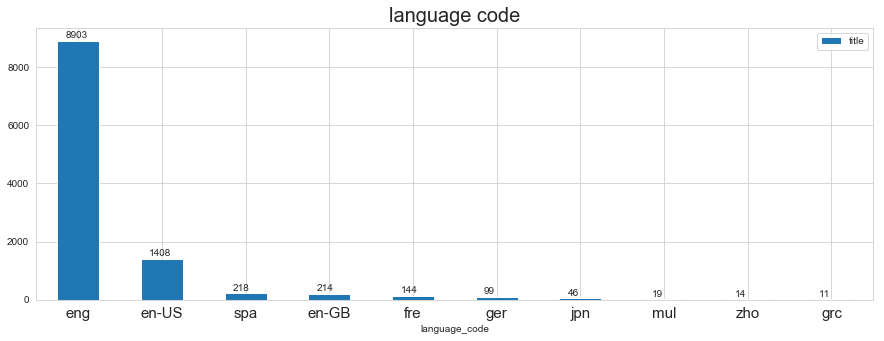

In [20]:

ax =books.groupby('language_code')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('language_code').plot.bar(figsize=(15,5),rot=0)
plt.title('language code',fontsize=20)
plt.xticks(fontsize=15)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+100))

**Hence the top 10 languages who have most number of books whose books are**
* eng    English  
* en-US  American English
* spa    Spanish 
* en-GB  British English 
* fre    French 
* ger    German  
* jpn    Japanese
* mul    Multiple languages
* zho    Chinese 
* grc    Greek, Ancient  

### Average rating for the books according to the language

In [21]:
#In this we have found top 10 languages which recevied the maximum rating
books.groupby("language_code").average_rating.max().sort_values(ascending = False).head(10)


language_code
wel      5.00
eng      5.00
grc      5.00
en-US    4.88
ger      4.78
en-GB    4.72
zho      4.60
fre      4.59
jpn      4.57
spa      4.57
Name: average_rating, dtype: float64

**Hence the top 10 languages whose books recived maximum average_rating are**
* wel    Welsh
* eng    English  
* grc    Greek, Ancient  
* en-US  American English  
* ger    German  
* en-GB  British English 
* zho    Chinese 
* fre    French 
* jpn    Japanese 
* spa    Spanish 

### Analysing with respect to average rating

In [22]:
#displaying list of 5 best rated books from 1900 to 2020.
books.sort_values("average_rating",ascending = False)[["average_rating","title","authors","ratings_count","text_reviews_count"]].head(10)

,average_rating,title,authors,ratings_count,text_reviews_count
8544,5.0,Fanning the Flame: Bible Cross and Mission,Chris Green/Chris Wright/Paul Douglas Gardner,1,1
855,5.0,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,4,1
6184,5.0,Taxation of Mineral Rents,Ross Garnaut,1,0
6775,5.0,Delwau Duon: Peintiadau Nicholas Evans = Symph...,Nicholas Evans/Rhonda Evans,1,0
5648,5.0,Colossians and Philemon: A Critical and Exeget...,R. McL. Wilson,1,0
5647,5.0,Winchester Shotguns,Dennis Adler/R.L. Wilson,2,0
5023,5.0,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,1,0
4933,5.0,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,4,0
4788,5.0,The Diamond Color Meditation: Color Pathway to...,John Diamond,5,3
4125,5.0,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,2,0


~Hence the Top average rated book is 

<img src="Images/book3.jpg">

~ Although the average_count is high but the ratings_count and text_reviews_count are low

### Most frequent pubhlisher of top 20 books with repect to average rating


In [23]:
books.sort_values("average_rating",ascending = False)["publisher"].head(20)

8544                           Zondervan
855                   Teaching Resources
6184        Oxford University Press  USA
6775                             Y Lolfa
5648                     T&T Clark Int'l
5647                     Chartwell Books
5023                 Boosey & Hawkes Inc
4933                       Vantage Press
4788               Square One Publishers
4125                          BradyGames
9282     University Press of New England
9324                        Disney Press
9720                     Academica Press
9847          Texas A&M University Press
9893                           Multnomah
1243                  Arcadia Publishing
6247                       Courage Books
10262                           Raintree
624         Oxford University Press  USA
786                       Schirmer Mosel
Name: publisher, dtype: object

### Now Finding the best top average_rated books for 1900s and 2000s

In [24]:
#best top 10 average_rated of 1900s 
ts = pd.to_datetime("1/1/2000")
books19s = books.loc[books["publication_date"] < ts, : ]
books19s.sort_values("average_rating",ascending = False)[["average_rating","title","authors"]].head(10)

,average_rating,title,authors
4933,5.00,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow
624,5.00,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart
6775,5.00,Delwau Duon: Peintiadau Nicholas Evans = Symph...,Nicholas Evans/Rhonda Evans
6184,5.00,Taxation of Mineral Rents,Ross Garnaut
6973,4.78,Wissenschaft der Logik: Die Lehre Vom Begriff ...,Georg Wilhelm Friedrich Hegel
6589,4.76,It's a Magical World (Calvin and Hobbes #11),Bill Watterson
6590,4.72,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,Bill Watterson
10937,4.70,The Price of the Ticket: Collected Nonfiction ...,James Baldwin
6591,4.69,The Days Are Just Packed,Bill Watterson
2248,4.67,Bill Buzz,Roger Hargreaves/Gray Jolliffe


~The above list is the best 10 top average_rated books of 1900s

In [25]:
books20s = books.loc[books["publication_date"] >= ts, : ]
books20s.sort_values("average_rating",ascending = False)[["average_rating","title","authors"]].head(10)

,average_rating,title,authors
5648,5.0,Colossians and Philemon: A Critical and Exeget...,R. McL. Wilson
9720,5.0,The Irish Anatomist: A Study of Flann O'Brien,Keith Donohue
9282,5.0,Oliver Wendell Holmes in Paris: Medicine Theo...,William C. Dowling
9324,5.0,Tyrannosaurus Wrecks (Stanley #1),Laura Driscoll/Alisa Klayman-Grodsky/Eric ...
10262,5.0,Bill Gates: Computer Legend (Famous Lives),Sara Barton-Wood
1243,5.0,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee
855,5.0,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy
5647,5.0,Winchester Shotguns,Dennis Adler/R.L. Wilson
786,5.0,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester
6247,5.0,The New Big Book of America,Todd Davis/Marc Frey


~The above is the best 10 top average_rated books of 2000s 

### To Find top 10 books which recived the highest rating counts



**~ratings_count :- Total number of rating a book recived**

In [26]:
book = books.sort_values("ratings_count",ascending = False)[["ratings_count","title","authors",]].head(10)
book

,ratings_count,title,authors
10336,4597666,Twilight (Twilight #1),Stephenie Meyer
1697,2530894,The Hobbit or There and Back Again,J.R.R. Tolkien
1462,2457092,The Catcher in the Rye,J.D. Salinger
307,2418736,Angels & Demons (Robert Langdon #1),Dan Brown
3,2339585,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré
4415,2293963,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré
1,2153167,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré
23,2128944,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien
2114,2111750,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl
0,2095690,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré


In [54]:
trace1 = go.Bar(x = book["title"],y=book["ratings_count"])
layout = go.Layout(barmode = "group",title = "Top 10 books with highest rating counts", plot_bgcolor='rgb(222, 222, 222)')
fig = go.Figure(data = [trace1],layout = layout)
iplot(fig,filename = "grouped-bar")

In [51]:
#Code for plotting the radar chart to get the better understanding about the our data.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # improves plot aesthetics


def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

# example data
variables = ("average_rating","ratings_count" ,"text_reviews_count ")
ranges = [(books["average_rating"].min(),books["average_rating"].max()),
         (books["ratings_count"].min(),books["ratings_count"].max()), (books["text_reviews_count"].min(),books["text_reviews_count"].max())]            


C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning:


Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning:


Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



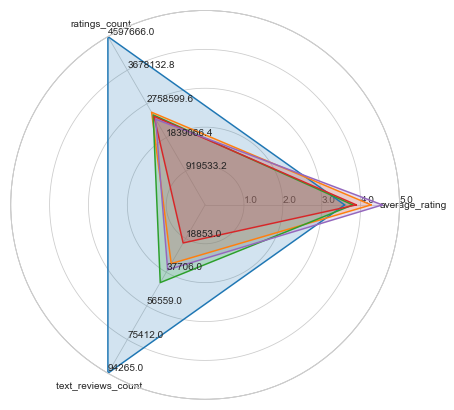

In [53]:
index1 = [10336,1697,1462,307,3]
fig1 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig1, variables, ranges)
    
for i in index1:
    data =(books.loc[i,["average_rating","ratings_count","text_reviews_count"] ] )
    data = (data["average_rating"],data["ratings_count"],data["text_reviews_count"])
    radar.plot(data)
    radar.fill(data,alpha = 0.2)
plt.show()

**~The above radar plot is of top 5 books which have the maximum rating_counts.But we can see that ratings_count and rext_reviews_count are little bit related to each other but ratings_count and average_rating are not that much related as ratings_count and text_reviews_count.**

<img src="Images/book4.jpg">

### Finding top 10 maximum ratings_count books for 1990's and 2000's 

In [27]:
#maximum ratings_count books for 1990's
books19s.sort_values("ratings_count",ascending = False)[["ratings_count","title","authors"]].head(10)

,ratings_count,title,authors
4415,2293963,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré
2116,2036679,Lord of the Flies,William Golding
284,1631221,The Alchemist,Paulo Coelho/Alan R. Clarke/Özdemir İnce
1467,1247221,Brave New World,Aldous Huxley
1430,1001671,Slaughterhouse-Five,Kurt Vonnegut Jr.
5093,999139,Gone with the Wind,Margaret Mitchell
3156,978535,The Shining,Stephen King
566,800349,Into the Wild,Jon Krakauer
4796,774987,Dracula,Bram Stoker/Nina Auerbach/David J. Skal
910,764134,The Secret Garden,Frances Hodgson Burnett


<img src="Images/book5.png">



~Harry Potter and the Chamber of Secrets gets the maximum ratings_count for 1990's

In [28]:
#Maximum ratings_count books for 2000's
books20s.sort_values("ratings_count",ascending = False)[["ratings_count","title","authors"]].head(10)

,ratings_count,title,authors
10336,4597666,Twilight (Twilight #1),Stephenie Meyer
1697,2530894,The Hobbit or There and Back Again,J.R.R. Tolkien
1462,2457092,The Catcher in the Rye,J.D. Salinger
307,2418736,Angels & Demons (Robert Langdon #1),Dan Brown
3,2339585,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré
1,2153167,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré
23,2128944,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien
2114,2111750,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl
0,2095690,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré
5015,1893917,Romeo and Juliet,William Shakespeare/Paul Werstine/Barbara A. M...


### To Find top 10 books which received the highest text review counts counts

**~text_reviews_count : Total number of written text reviews the book received.**

In [68]:
book = books.sort_values("text_reviews_count",ascending = False)[["text_reviews_count","title","authors",]].head(10)
book

,text_reviews_count,title,authors
10336,94265,Twilight (Twilight #1),Stephenie Meyer
5270,86881,The Book Thief,Markus Zusak/Cao Xuân Việt Khương
1069,56604,The Giver (The Giver #1),Lois Lowry
284,55843,The Alchemist,Paulo Coelho/Alan R. Clarke/Özdemir İnce
10700,52759,Water for Elephants,Sara Gruen
7309,47951,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan
5407,47620,Eat Pray Love,Elizabeth Gilbert
2060,46176,The Glass Castle,Jeannette Walls
1462,43499,The Catcher in the Rye,J.D. Salinger
3,36325,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré


In [70]:
book.reset_index(drop = True)
#plt.figure(figsize=(21,8))
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
#sns.barplot(x="text_reviews_count",y="title",data=book,palette='Spectral')

trace1 = go.Bar(x = book["title"],y=book["text_reviews_count"])
layout = go.Layout(barmode = "group",title = "Top 10 books with highest text reviews counts", plot_bgcolor='rgb(222, 222, 222)')
fig = go.Figure(data = [trace1],layout = layout)
iplot(fig,filename = "grouped-bar")

~Hence twilight gets maximum number of both text review counts and ratings_count 

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


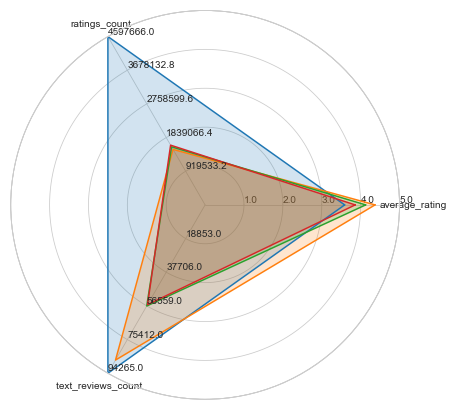

In [190]:
index1 = [10336,5270,1069,284]
fig1 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig1, variables, ranges)
    
for i in index1:
    data =(books.loc[i,["average_rating","ratings_count","text_reviews_count"] ] )
    data = (data["average_rating"],data["ratings_count"],data["text_reviews_count"])
    radar.plot(data)
    radar.fill(data,alpha = 0.2)
plt.show()

**~The above radar plot is of top 5 books which have the maximum text_reviews_count.But we can see that ratings_count and rext_reviews_count are little bit related to each other but ratings_count and average_rating are not that much related as ratings_count and text_reviews_count.**

### Finding top 10 maximum text_reviews_count books for 1990's and 2000's 

In [30]:
#maximum  text_reviews_count books for 1990's
books19s.sort_values("text_reviews_count",ascending = False)[["text_reviews_count","title","authors"]].head(10)

,text_reviews_count,title,authors
284,55843,The Alchemist,Paulo Coelho/Alan R. Clarke/Özdemir İnce
4415,34692,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré
2116,26199,Lord of the Flies,William Golding
1467,20014,Brave New World,Aldous Huxley
1430,19056,Slaughterhouse-Five,Kurt Vonnegut Jr.
566,18198,Into the Wild,Jon Krakauer
5093,15323,Gone with the Wind,Margaret Mitchell
3156,15105,The Shining,Stephen King
4796,14944,Dracula,Bram Stoker/Nina Auerbach/David J. Skal
235,14702,Atlas Shrugged,Ayn Rand/Leonard Peikoff


<img src="Images/book6.png">



~The Alchemist gets the maximum text_reviews_count for 1990's

In [31]:
#Maximum text_reviews_count books for 2000's
books20s.sort_values("text_reviews_count",ascending = False)[["text_reviews_count","title","authors"]].head(10)

,text_reviews_count,title,authors
10336,94265,Twilight (Twilight #1),Stephenie Meyer
5270,86881,The Book Thief,Markus Zusak/Cao Xuân Việt Khương
1069,56604,The Giver (The Giver #1),Lois Lowry
10700,52759,Water for Elephants,Sara Gruen
7309,47951,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan
5407,47620,Eat Pray Love,Elizabeth Gilbert
2060,46176,The Glass Castle,Jeannette Walls
1462,43499,The Catcher in the Rye,J.D. Salinger
3,36325,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré
310,35877,The Da Vinci Code (Robert Langdon #2),Dan Brown


### Top 10  publishers which have the maximum sum of ratings_counts

In [32]:
books.groupby("publisher").ratings_count.sum().sort_values(ascending = False).head(10)

publisher
Penguin Books                10967448
Scholastic Inc.               6617877
Little  Brown and Company     5493803
Penguin Classics              5281321
Vintage                       5001557
Back Bay Books                4198407
Bantam                        3949319
Pocket Books                  3883190
Grand Central Publishing      3586469
Houghton Mifflin              3173586
Name: ratings_count, dtype: int64

~Above list is of the publisher which have the maxmium sum of ratings_counts

<img src="Images/book7.png">

**Penguin publisher with maxmium sum of rating_counts**

### Finding top 10 publisers with maximum sum of ratings_counts books for 1990's and 2000's 

In [33]:
#publisher with maximum sum of ratings_counts books for 1990's
books.groupby("publisher").ratings_count.sum().sort_values(ascending = False).head(10)


publisher
Penguin Books                10967448
Scholastic Inc.               6617877
Little  Brown and Company     5493803
Penguin Classics              5281321
Vintage                       5001557
Back Bay Books                4198407
Bantam                        3949319
Pocket Books                  3883190
Grand Central Publishing      3586469
Houghton Mifflin              3173586
Name: ratings_count, dtype: int64

In [34]:
#publisher with maximum sum of ratings_counts books for 2000's
books20s.groupby("publisher").ratings_count.sum().sort_values(ascending = False).head(10)

publisher
Penguin Books                8337081
Scholastic Inc.              6614426
Little  Brown and Company    5449549
Penguin Classics             4756565
Back Bay Books               3987415
Bantam                       3770453
Vintage                      3762044
Pocket Books                 3584874
Grand Central Publishing     3233844
Houghton Mifflin             3161452
Name: ratings_count, dtype: int64

### Top 10 publishers which have maximum sum of text_reviews_count

In [35]:
books.groupby("publisher").text_reviews_count.sum().sort_values(ascending = False).head(10)

publisher
Penguin Books                296756
Vintage                      242670
Alfred A. Knopf              139108
Little  Brown and Company    125560
Penguin Classics             107382
Harper Perennial             103038
HarperCollins                103031
Bantam                       102505
Back Bay Books                99836
Scholastic Inc.               94863
Name: text_reviews_count, dtype: int64

~Above list of the publisher which have maximum sum of text counts

### Finding top 10 publisers with maximum sum of text_reviews_count books for 1990's and 2000's 

In [36]:
#publisher with maximum sum of ratings_counts books for 1990's
books19s.groupby("publisher").text_reviews_count.sum().sort_values(ascending = False).head(10)

publisher
HarperCollins                               62407
Vintage                                     60842
Penguin Books                               53080
Anchor Books                                40705
Arthur A. Levine Books / Scholastic Inc.    34692
Dial Press                                  25743
Warner Books                                24183
Plume                                       20907
HarperPerennial / Perennial Classics        20014
Ballantine Books                            18115
Name: text_reviews_count, dtype: int64

<img src="Images/book8.png">

**~ Athough Penguin Books were always at the top both for 1900's and 2000's combined but HarperCollins was the has the most text_reviews_count for 1900's**

In [37]:
#publisher with maximum sum of ratings_counts books for 2000's
books20s.groupby("publisher").text_reviews_count.sum().sort_values(ascending = False).head(10)

publisher
Penguin Books                243676
Vintage                      181828
Alfred A. Knopf              138916
Little  Brown and Company    123881
Harper Perennial              97265
Penguin Classics              96722
Bantam                        96131
Scholastic Inc.               94619
Back Bay Books                88847
Grand Central Publishing      82434
Name: text_reviews_count, dtype: int64

### *After analysing about the publishers we came to know that*

**1).Penguin Books has the maximum ratings_count sum for both 1900's and 2000's**

**2).Penguin Books also has the maxium text_reviews_count for 2000's**

**3).HarperCollins has the maximum text_reviews_count for 1900's**

~Thus we can conclude that Penguin Books turns out to be the most reviewed publishers for both 1900's and 2000's

<img src="Images/book7.png">

### Top 10 authors  which have the maximum sum of ratings_counts

In [38]:
books.groupby("authors").ratings_count.sum().sort_values(ascending = False).head(10)

authors
J.K. Rowling/Mary GrandPré                 8923980
J.R.R. Tolkien                             4776638
Stephenie Meyer                            4597666
Dan Brown                                  4135380
Nicholas Sparks                            3048149
Stephen King                               2985634
J.D. Salinger                              2777908
Rick Riordan                               2413447
George Orwell/Boris Grabnar/Peter Škerl    2111750
John Steinbeck                             2091579
Name: ratings_count, dtype: int64

~Above list of the authors which have maximum sum of ratings_count

### Finding top 10 authors with maximum sum of ratings_counts books for 1990's and 2000's 

In [39]:
#publisher with maximum sum of ratings_counts books for 1990's
books19s.groupby("authors").ratings_count.sum().sort_values(ascending = False).head(10)

authors
J.K. Rowling/Mary GrandPré                  2294110
Stephen King                                2094875
William Golding                             2040511
Paulo Coelho/Alan R. Clarke/Özdemir İnce    1631221
Aldous Huxley                               1262532
Kurt Vonnegut Jr.                           1251982
Jon Krakauer                                1151755
Margaret Mitchell                            999139
Bram Stoker/Nina Auerbach/David J. Skal      774987
Frances Hodgson Burnett                      764134
Name: ratings_count, dtype: int64

In [40]:
#publisher with maximum sum of ratings_counts books for 1990's
books20s.groupby("authors").ratings_count.sum().sort_values(ascending = False).head(10)

authors
J.K. Rowling/Mary GrandPré                 6629870
J.R.R. Tolkien                             4776349
Stephenie Meyer                            4597666
Dan Brown                                  4135380
Nicholas Sparks                            2843906
J.D. Salinger                              2777657
Rick Riordan                               2413447
George Orwell/Boris Grabnar/Peter Škerl    2111750
John Steinbeck                             2088939
Jodi Picoult                               2026166
Name: ratings_count, dtype: int64

### Top 10 authors  which have the maximum sum of text_reviews_count

In [41]:
books.groupby("authors").text_reviews_count.sum().sort_values(ascending = False).head(10)

authors
J.K. Rowling/Mary GrandPré           128006
Stephenie Meyer                       94265
Markus Zusak/Cao Xuân Việt Khương     86881
Jodi Picoult                          79300
Lois Lowry                            74197
Rick Riordan                          69769
Diana Gabaldon                        66428
Dan Brown                             60875
Nicholas Sparks                       60426
Stephen King                          55897
Name: text_reviews_count, dtype: int64

### Finding top 10 authors with maximum sum of text_reviews_count for 1990's and 2000's 

In [42]:
#publisher with maximum sum of ratings_counts books for 1990's
books19s.groupby("authors").text_reviews_count.sum().sort_values(ascending = False).head(10)

authors
Paulo Coelho/Alan R. Clarke/Özdemir İnce    55843
Stephen King                                35041
J.K. Rowling/Mary GrandPré                  34705
Jon Krakauer                                29899
Kurt Vonnegut Jr.                           27451
William Golding                             26542
Ayn Rand/Leonard Peikoff                    25851
Aldous Huxley                               20570
Margaret Mitchell                           15323
Bram Stoker/Nina Auerbach/David J. Skal     14944
Name: text_reviews_count, dtype: int64

In [43]:
#publisher with maximum sum of ratings_counts books for 1990's
books20s.groupby("authors").text_reviews_count.sum().sort_values(ascending = False).head(10)

authors
Stephenie Meyer                      94265
J.K. Rowling/Mary GrandPré           93301
Markus Zusak/Cao Xuân Việt Khương    86881
Jodi Picoult                         76827
Lois Lowry                           74153
Rick Riordan                         69769
Diana Gabaldon                       65509
Dan Brown                            60875
Nicholas Sparks                      56712
Agatha Christie                      53291
Name: text_reviews_count, dtype: int64

### *After analysing about the authors we came to know that*

**1).J.K. Rowling and Mary GrandPré both together have the maximum number of sum of rating_counts for 2000's and 1900's.**  

**2).J.K. Rowling and Mary GrandPré both together have the maximum number of sum of text_reviews_count**

**3).Paulo Coelho,Alan R. Clarke and Özdemir İnce has the maximum number of text_reviews_count for 1900's**

**4).Stephenie Meyer has the maximum number text_reviews_count for 2000's**

~Thus we can see J.K. Rowling and Mary GrandPré together were best reviewed author.

In [44]:
books[books["authors"] == "J.K. Rowling/Mary GrandPré"]["title"]

0       Harry Potter and the Half-Blood Prince (Harry ...
1       Harry Potter and the Order of the Phoenix (Har...
3       Harry Potter and the Prisoner of Azkaban (Harr...
4       Harry Potter Boxed Set  Books 1-5 (Harry Potte...
4415    Harry Potter and the Chamber of Secrets (Harry...
8873    Harry Potter and the Sorcerer's Stone (Harry P...
Name: title, dtype: object

In [198]:
books["reviews"] = books["text_reviews_count"] + books["ratings_count"]

ShubhangiDabral13...